<a href="https://colab.research.google.com/github/sabinedaher20-spec/DataScience-GenAI-Submissions-/blob/main/In_class_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To begin with the EDA, I asked gemini to "Load the xlsx file into a pandas DataFrame and display the first 5 rows" to get data into memory and understand basic structure before analysis.

In [1]:
import pandas as pd

file_path = '/content/in_class_test.xlsx'
df = pd.read_excel(file_path)
display(df.head())

,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,...,Cereal Consumption Rye,Cereal Consumption Barley,Cereal Consumption Sorghum,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
4,Afghanistan,1991,Female,52.119,110.7,102.1,120.4,167.1,153.0,182.6,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28


The code displayed the first five rows of the dataset, just like I asked it to. To confirm how many columns there are, I will ask Gemini for to "find the shape of the data set".


In [3]:
display(df.shape)

(22050, 150)

The code displayed that there are 22,050 rows and 150 columns. To double-check, I asked Gemini to "show me the dataset info".

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22050 entries, 0 to 22049
Columns: 150 entries, Country to Diet Calories Carbohydrates
dtypes: float64(147), int64(1), object(2)
memory usage: 25.2+ MB


The output futher confims that there are 22,050 rows and 150 columns. We can also see from this our data varies from object, int64, and float64.

 I asked Gemini to "check for missing data" to ensure the dataset is complete, unbiased, and reliable before analysis.

In [9]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
display(missing_data.sort_values(ascending=False))

,0
Reproductive Age Women,21708
Air Pollution Death Rate Ischaemic Heart Disease,21513
Low CI Value Air Pollution Death Rate Stroke,21513
High CI Value Air Pollution Death Rate Stroke,21513
Low CI Value Air Pollution Death Rate Stroke Age Standarized,21513
...,...
Homicide Rate,5726
% Population Aged 65+,5364
% Population Aged 15-64,5364
% Population Aged 0-14,5364


The output given confirms that there is many miisng data. There are many ways we can deal with this issue, including deleting the rows affected or even deleting the columns. To decide how to handle missing data, I will ask Gemini to "calculate the percentage of missing values in each column". If a column has over 40% missing data, we will remove the entire column; otherwise, we will delete only the rows containing missing values.

In [12]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_percentages = missing_percentages[missing_percentages > 0]
display(missing_percentages.sort_values(ascending=False))

,0
Reproductive Age Women,98.448980
Air Pollution Death Rate Ischaemic Heart Disease,97.564626
Low CI Value Air Pollution Death Rate Stroke,97.564626
High CI Value Air Pollution Death Rate Stroke,97.564626
Low CI Value Air Pollution Death Rate Stroke Age Standarized,97.564626
...,...
Homicide Rate,25.968254
% Population Aged 65+,24.326531
% Population Aged 15-64,24.326531
% Population Aged 0-14,24.326531


Based on the results, several columns have more than 40% missing data. Therefore, I will ask Gemini to "delete any column with over 40% missing values, and for the remaining columns, delete only the rows that contain missing values".

In [13]:
# Identify columns to drop (more than 40% missing values)
columns_to_drop = missing_percentages[missing_percentages > 40].index
df_cleaned = df.drop(columns=columns_to_drop)

# For the remaining columns, drop rows that contain missing values
df_cleaned = df_cleaned.dropna()

display(df_cleaned.head())

,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,...,Income per Capita,Total Population,GNI per Capita,Conflict and Terrorism Deaths,Homicide Rate,Vegetable Consumption,Fruit Consumption Other,Fruit Consumption Oranges And Mandarines,Fruit Consumption Apples,Fruit Consumption Grapes
57,Afghanistan,2009,Both sexes,60.484,66.53,61.92,71.67,91.43,84.22,99.54,...,387.267198,28394813.0,450.0,6553.5205,12.111042,38.12,8.03,1.37,2.19,7.64
58,Afghanistan,2009,Female,61.898,62.32,57.85,67.43,87.47,80.52,95.51,...,387.267198,28394813.0,450.0,6553.5205,12.111042,38.12,8.03,1.37,2.19,7.64
59,Afghanistan,2009,Male,59.159,70.51,65.41,76.18,95.23,87.48,103.80,...,387.267198,28394813.0,450.0,6553.5205,12.111042,38.12,8.03,1.37,2.19,7.64
60,Afghanistan,2010,Both sexes,61.028,64.10,59.42,69.27,87.62,80.28,95.77,...,479.112518,29185507.0,510.0,7259.4746,12.330794,34.40,8.61,4.35,2.30,9.03
61,Afghanistan,2010,Female,62.459,60.02,55.48,65.16,83.71,76.48,91.81,...,479.112518,29185507.0,510.0,7259.4746,12.330794,34.40,8.61,4.35,2.30,9.03


In [14]:
# Verify the new shape and absence of missing values
display(df_cleaned.shape)
display(df_cleaned.isnull().sum().sum())

(8214, 29)

np.int64(0)

After removing columns with over 40% missing data and deleting rows with missing values in the remaining columns, the cleaned dataset now contains 8,214 rows and 29 columns, ensuring higher data quality and consistency for further analysis.

I will ask Gemini to "check for any duplicates" because it helps ensure that each observation in the dataset is unique and prevents repeated entries from biasing the analysis or distorting statistical results.

In [15]:
duplicates = df_cleaned.duplicated().sum()
display(f"Number of duplicate rows: {duplicates}")

'Number of duplicate rows: 0'

Based on the output, there are no duplicate records in the dataset, which means we can proceed with a clean and reliable dataset for further analysis.

I will ask Gemini to "give me a summary statistics about this data" to help me understand the overall distribution, central tendencies, and variability of each numerical feature before moving into deeper analysis or visualisation.

In [16]:
display(df_cleaned.describe())

,Year,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,% Population Aged 0-14,% Population Aged 15-64,...,Income per Capita,Total Population,GNI per Capita,Conflict and Terrorism Deaths,Homicide Rate,Vegetable Consumption,Fruit Consumption Other,Fruit Consumption Oranges And Mandarines,Fruit Consumption Apples,Fruit Consumption Grapes
count,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,...,8214.000000,8.214000e+03,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000
mean,2002.489774,67.881810,34.533634,31.739621,37.690782,50.825687,46.226752,56.108574,31.223215,61.278092,...,7526.452843,4.264866e+07,8968.429511,469.488271,8.691255,78.072045,21.204821,14.836077,8.781980,4.245493
std,6.660970,10.362421,32.790445,30.431518,35.559141,56.117457,51.488822,61.565698,10.963293,6.815303,...,11831.481536,1.544751e+08,14180.916322,9821.936330,12.099335,56.981380,14.463942,18.191931,10.866443,6.568970
min,1990.000000,24.834000,1.710000,1.480000,1.980000,2.180000,1.890000,2.520000,12.533921,45.950978,...,-26.324454,7.240000e+04,110.000000,0.000000,0.497195,5.870000,0.740000,0.000000,0.000000,0.000000
25%,1997.000000,61.167000,8.050000,7.630000,8.400000,9.580000,9.090000,9.990000,20.081488,54.973601,...,728.517097,3.011487e+06,870.000000,0.000000,1.913223,35.660000,11.790000,2.610000,0.410000,0.090000
50%,2003.000000,70.436000,22.460000,20.140000,25.105000,26.705000,23.830000,29.955000,31.883932,62.390725,...,2400.607033,8.446752e+06,2790.000000,0.000000,4.302775,65.065000,18.050000,8.905000,3.905000,1.450000
75%,2008.000000,75.641750,51.727500,46.910000,56.667500,74.447500,66.855000,83.920000,41.682097,66.972333,...,8064.735808,2.449831e+07,9460.000000,15.111078,9.959808,105.050000,27.330000,21.050000,14.210000,6.150000
max,2013.000000,86.604000,164.100000,153.300000,175.300000,331.100000,309.400000,354.400000,51.735845,80.008093,...,82227.021940,1.357380e+09,104330.000000,503917.840000,102.742835,353.140000,113.700000,218.110000,67.000000,48.160000


I noticed some clear patterns and surprising results in this dataset. Covering global trends from 1990 to 2013, the data shows average life expectancy is 68 years but ranges from 25 to 87, reflecting big differences in living conditions. Infant mortality varies widely, from just a few deaths per 1,000 births to over 160, which highlights unequal healthcare. Income gaps are huge, with some countries having almost nothing per person and others exceeding $100,000. Most countries have young populations, fruit and vegetable intake is inconsistent, and there are some odd spikes and negative values that likely indicate errors and need double-checking before deeper analysis.

# Visualising the Data

In this section i will be answering 4 questions, using diffrenr graphs for visulisation:

1.   How has Life Expectancy changed over the years, and what is its distribution across different countries?
2.   How does 'Income per Capita' vary across different countries and over time, and what is its relationship with 'Life Expectancy'?



To answer the first question, I will ask Gemini to "create a line chart to show the overall change in average life expectancy from 1990–2013". This will also show the improvement over the years.

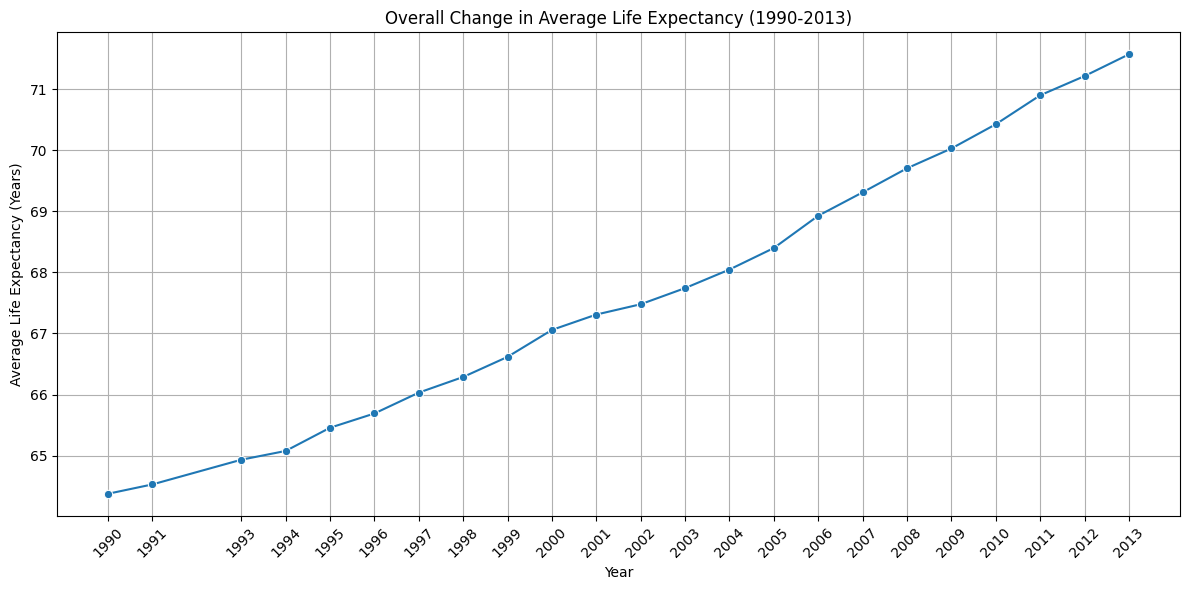

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average life expectancy per year
life_expectancy_over_time = df_cleaned.groupby('Year')['Life Expectancy'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Life Expectancy', data=life_expectancy_over_time, marker='o')
plt.title('Overall Change in Average Life Expectancy (1990-2013)')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (Years)')
plt.grid(True)
plt.xticks(life_expectancy_over_time['Year'].unique(), rotation=45)
plt.tight_layout()
plt.show()

The line chart clearly shows that, as expected, average life expectancy has risen consistently over time, reflecting global improvements in healthcare and living conditions.

To answer the second question, I will ask Gemini to “Create a bar chart showing Income per Capita by country”.

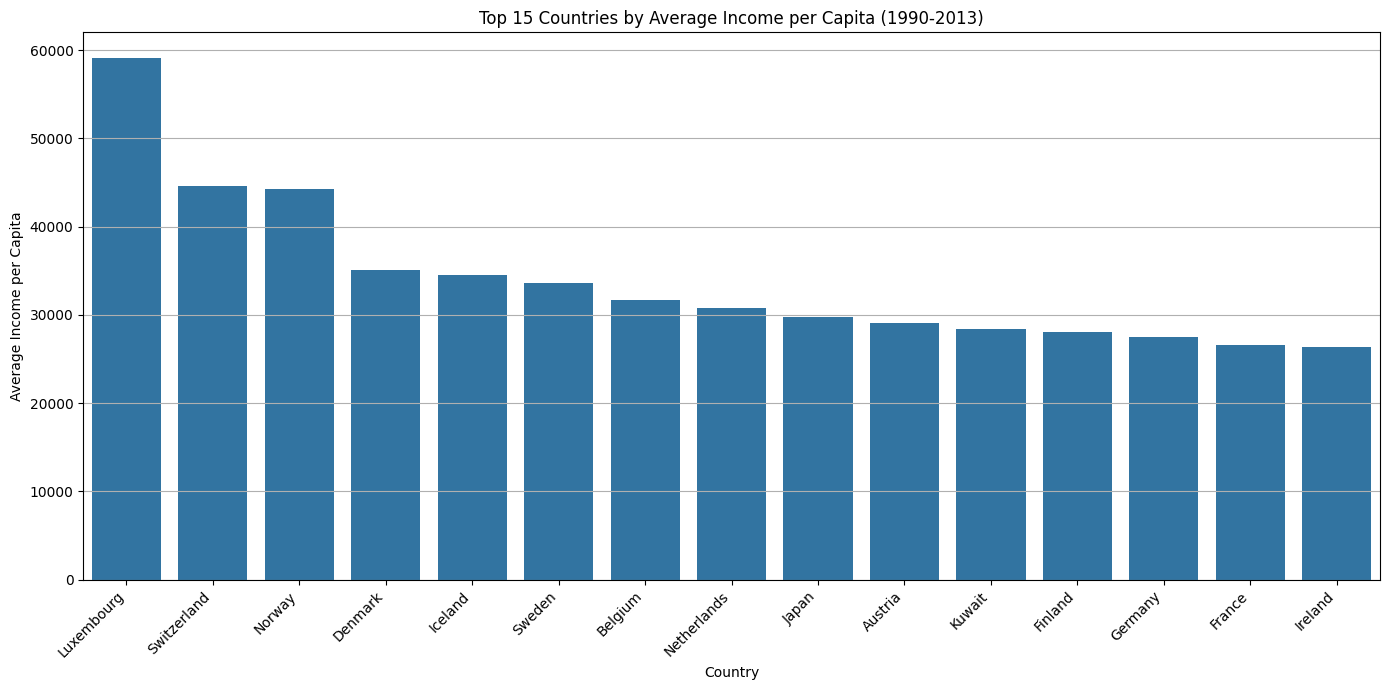

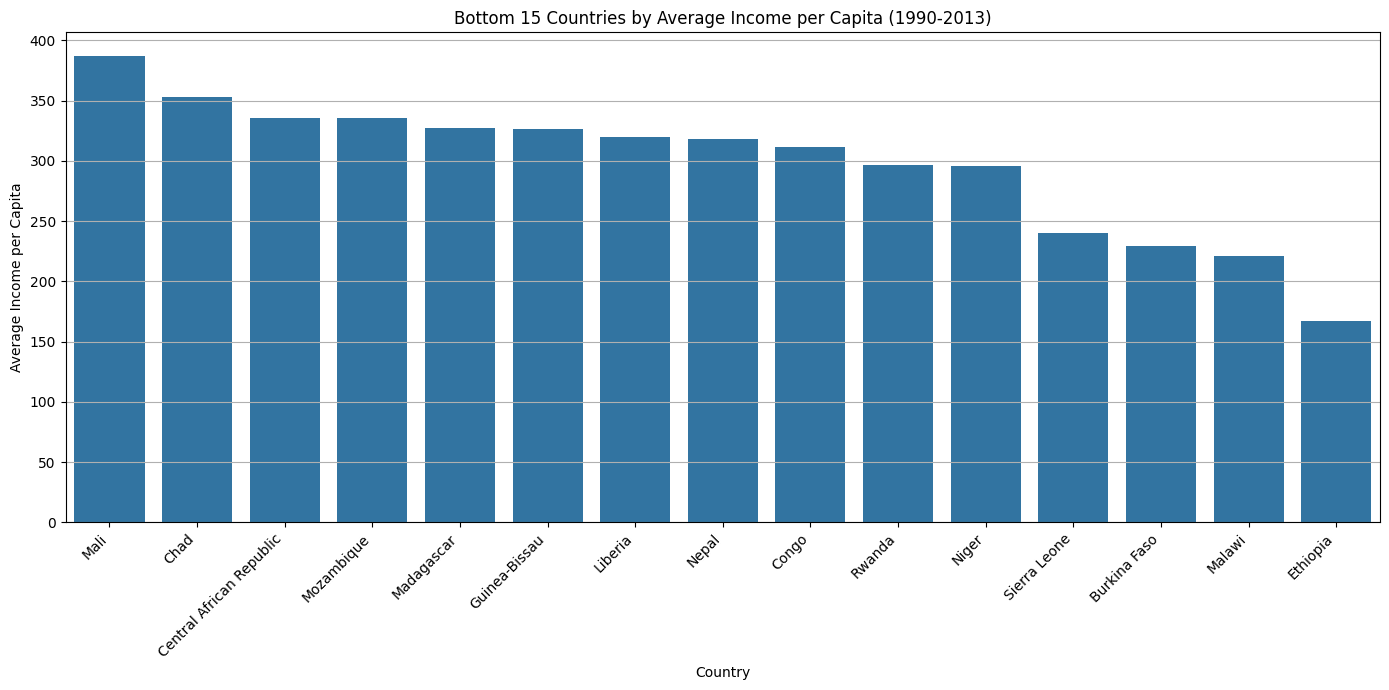

In [19]:
# For 'Income per Capita' by country, a boxplot can be very dense if there are many countries.
# Let's first look at the number of unique countries
num_countries = df_cleaned['Country'].nunique()

if num_countries > 20: # Arbitrary threshold, can be adjusted
    # If too many countries, visualize top N or use a bar chart of averages
    # For this, let's calculate the average Income per Capita per country
    avg_income_per_capita = df_cleaned.groupby('Country')['Income per Capita'].mean().sort_values(ascending=False).reset_index()

    # Display top 15 and bottom 15 countries for clarity in a bar chart
    top_15_countries = avg_income_per_capita.head(15)
    bottom_15_countries = avg_income_per_capita.tail(15)

    plt.figure(figsize=(14, 7))
    sns.barplot(x='Country', y='Income per Capita', data=top_15_countries)
    plt.title('Top 15 Countries by Average Income per Capita (1990-2013)')
    plt.xlabel('Country')
    plt.ylabel('Average Income per Capita')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    sns.barplot(x='Country', y='Income per Capita', data=bottom_15_countries)
    plt.title('Bottom 15 Countries by Average Income per Capita (1990-2013)')
    plt.xlabel('Country')
    plt.ylabel('Average Income per Capita')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    # If fewer countries, a boxplot is feasible to show distribution
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='Country', y='Income per Capita', data=df_cleaned)
    plt.title('Income per Capita Distribution by Country (1990-2013)')
    plt.xlabel('Country')
    plt.ylabel('Income per Capita')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

The charts show a clear global income gap. Wealthy nations like Luxembourg and Switzerland have average incomes above 50,000 dollars, while poorer countries like Mali and Chad stay below 500 dollars.